# Crime Data Analysis

**Description**
This dataset _"Crimes_-_2001_to_Present"_ consists of over 7 million crime records with 22 columns including case details, crime type, location, and arrest status.

# Loading Data

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshx27/crimes-2001-to-present")

print("Path to dataset files:", path)

d:\ai_engineering_tasks\my_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\John Doe\.cache\kagglehub\datasets\utkarshx27\crimes-2001-to-present\versions\1


In [5]:
dfo = pd.read_csv(r'C:\Users\John Doe\.cache\kagglehub\datasets\utkarshx27\crimes-2001-to-present\versions\1\Crimes_-_2001_to_Present.csv')

dfo.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [6]:
df = dfo.copy()

# Cleaning Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [8]:
df.shape

(7784664, 22)

In [9]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [10]:
df.reset_index(drop = True, inplace = True)

In [11]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [12]:
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [13]:
df.dropna(subset = ['Case Number', 'District'], inplace = True)

In [14]:
df['Location Description'] = df['Location Description'].fillna("Unknown")

In [15]:
df.drop(columns=['Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Longitude', 'Latitude'], inplace = True)

In [16]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,08B,2015,02/10/2018 03:50:01 PM,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,06,2015,02/10/2018 03:50:01 PM,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,06,2018,04/06/2019 04:04:43 PM,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,18,2015,02/10/2018 03:50:01 PM,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,08A,2015,02/10/2018 03:50:01 PM,"(41.881903443, -87.755121152)"


In [17]:
df.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
FBI Code                    0
Year                        0
Updated On                  0
Location                86847
dtype: int64

# Analysing Data

In [18]:
df.describe(include = "all")

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Location
count,7.784613e+06,7784613,7784613,7784613,7784613,7784613,7784613,7784613,7784613,7784613,7.784613e+06,7.784613e+06,7784613,7.784613e+06,7784613,7697766
unique,NaN,7784074,3207463,62845,404,36,544,216,2,2,NaN,NaN,26,NaN,5561,890511
top,NaN,HZ140230,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,NaN,06,NaN,02/10/2018 03:50:01 PM,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642144,913476,2026815,5749863,6708323,NaN,NaN,1642144,NaN,2787928,14272
mean,7.026442e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.185917e+03,1.129466e+01,NaN,2.009944e+03,NaN,NaN
std,3.502667e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.031331e+02,6.952422e+00,NaN,6.260645e+00,NaN,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.000000e+00,NaN,2.001000e+03,NaN,NaN
25%,3.792558e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.210000e+02,6.000000e+00,NaN,2.005000e+03,NaN,NaN
50%,7.029356e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034000e+03,1.000000e+01,NaN,2.009000e+03,NaN,NaN
75%,1.013114e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.731000e+03,1.700000e+01,NaN,2.015000e+03,NaN,NaN


In [19]:
crime_counts = df['Primary Type'].value_counts()
print(crime_counts)

Primary Type
THEFT                                1642144
BATTERY                              1422906
CRIMINAL DAMAGE                       887261
NARCOTICS                             747632
ASSAULT                               507291
OTHER OFFENSE                         483640
BURGLARY                              424393
MOTOR VEHICLE THEFT                   375490
DECEPTIVE PRACTICE                    344933
ROBBERY                               292329
CRIMINAL TRESPASS                     214316
WEAPONS VIOLATION                     106416
PROSTITUTION                           69839
OFFENSE INVOLVING CHILDREN             55719
PUBLIC PEACE VIOLATION                 52325
SEX OFFENSE                            30681
CRIM SEXUAL ASSAULT                    27630
INTERFERENCE WITH PUBLIC OFFICER       18392
LIQUOR LAW VIOLATION                   14901
GAMBLING                               14618
ARSON                                  13249
HOMICIDE                               125

In [20]:
arrests = df['Arrest'].value_counts()
print(arrests)

Arrest
False    5749863
True     2034750
Name: count, dtype: int64


In [21]:
crimes_per_year = df.groupby('Year').size()
print(crimes_per_year)

Year
2001    485878
2002    486802
2003    475979
2004    469419
2005    453770
2006    448173
2007    437082
2008    427127
2009    392817
2010    370495
2011    351964
2012    336261
2013    307468
2014    275731
2015    264755
2016    269786
2017    269070
2018    268773
2019    261245
2020    212092
2021    208571
2022    238215
2023     73140
dtype: int64


In [22]:
crimes_by_location = df['Location Description'].value_counts()
print(crimes_by_location)

Location Description
STREET                   2026815
RESIDENCE                1305836
APARTMENT                 879338
SIDEWALK                  728856
OTHER                     270022
                          ...   
POOLROOM                       1
TRUCKING TERMINAL              1
LIVERY AUTO                    1
POLICE FACILITY                1
EXPRESSWAY EMBANKMENT          1
Name: count, Length: 216, dtype: int64


# Visualization

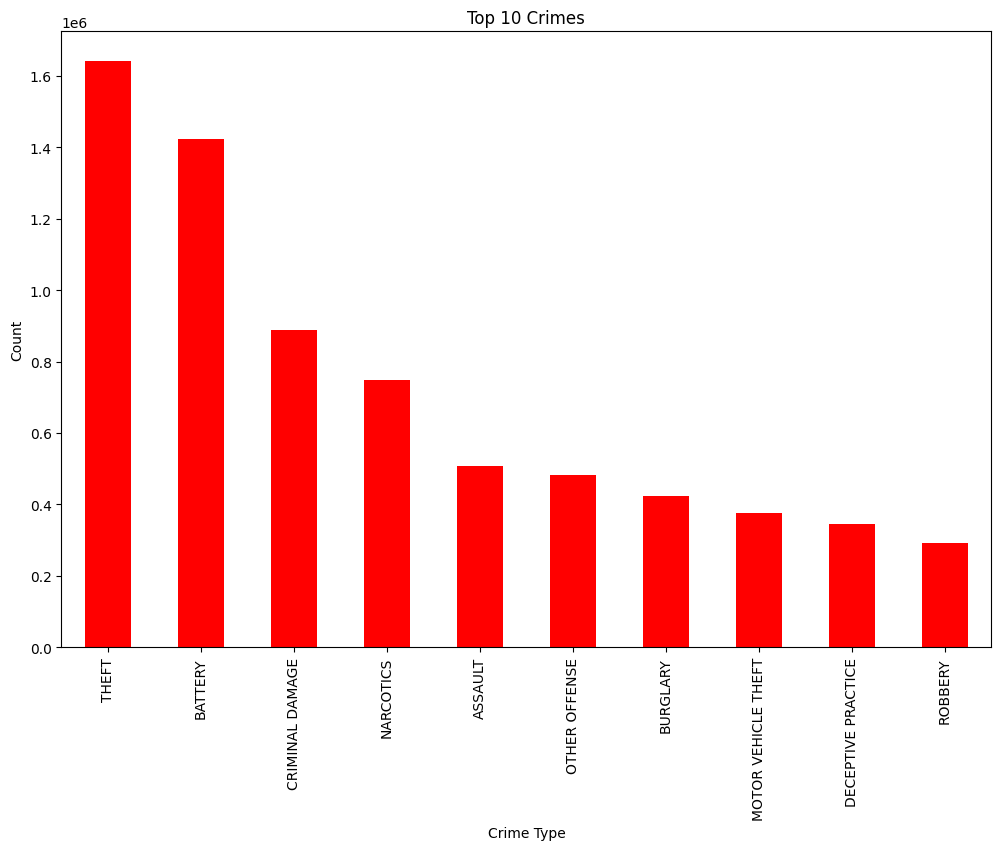

In [23]:
# this is for top 10 crimes over the years
plt.figure(figsize=(12, 8))
crime_counts.head(10).plot(kind='bar', color='red')
plt.title("Top 10 Crimes")
plt.ylabel("Count")
plt.xlabel("Crime Type")
plt.show()

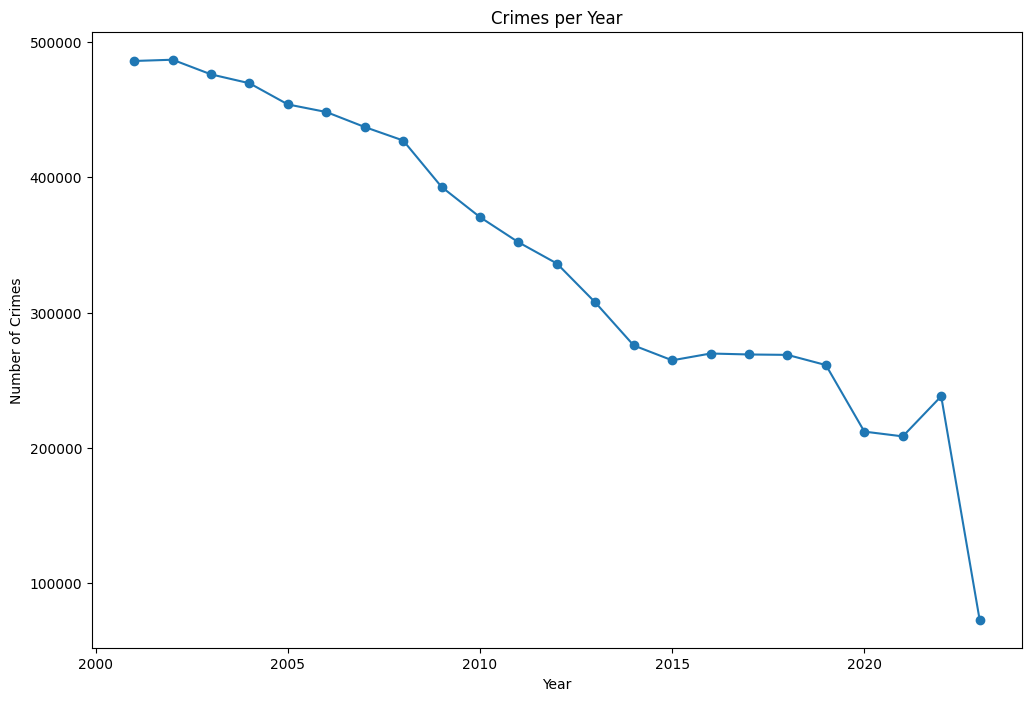

In [24]:
plt.figure(figsize=(12, 8))
crimes_per_year.plot(kind = 'line', marker = 'o')
plt.title("Crimes per Year")
plt.ylabel("Number of Crimes")
plt.xlabel("Year")
plt.show()

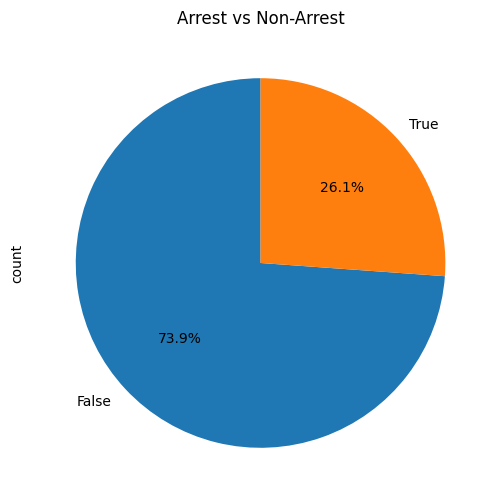

In [25]:
plt.figure(figsize = (6, 6))
df['Arrest'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)
plt.title("Arrest vs Non-Arrest")
plt.show()

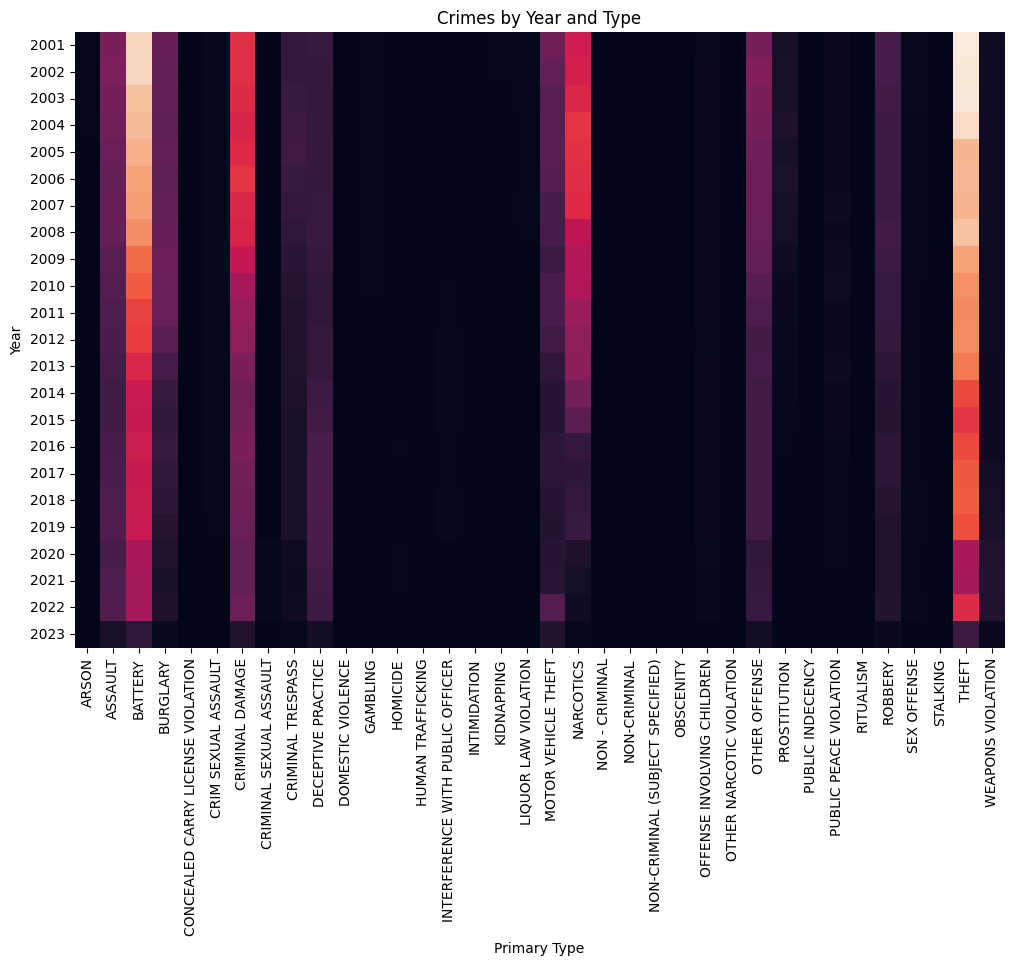

In [26]:
crime_heatmap = df.groupby(['Year', 'Primary Type']).size().unstack(fill_value = 0)
plt.figure(figsize = (12, 8))
sns.heatmap(crime_heatmap, cbar = False)
plt.title("Crimes by Year and Type")
plt.show()

In [27]:
df.to_csv("cleaned_crime_data.csv", index = False)